## __TicTacToe__ ##

### __Weak AI__###

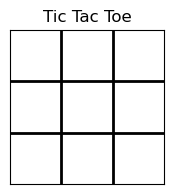

Available positions: [1, 2, 3, 4, 5, 6, 7, 8, 9]


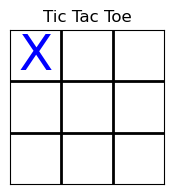

AI chooses position: 5


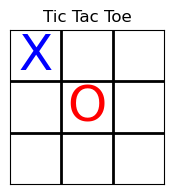

Available positions: [2, 3, 4, 6, 7, 8, 9]


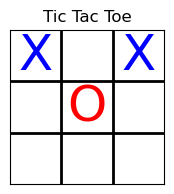

AI chooses position: 8


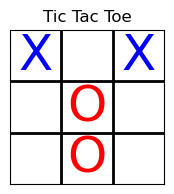

Available positions: [2, 4, 6, 7, 9]


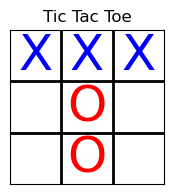

Player wins!


In [114]:
import matplotlib.pyplot as plt
import numpy as np
import random

def draw_tictactoe_board(board):
    fig, ax = plt.subplots(figsize=(2, 2))

    # Draw the grid
    for x in range(1, 3):
        ax.axvline(x, color="black", linewidth=2)
        ax.axhline(x, color="black", linewidth=2)

    # Add markers for the moves
    for i in range(3):
        for j in range(3):
            if board[i, j] == 1:
                ax.text(j + 0.5, 2.5 - i, "X", ha="center", va="center", fontsize=36, color="blue")
            elif board[i, j] == -1:
                ax.text(j + 0.5, 2.5 - i, "O", ha="center", va="center", fontsize=36, color="red")

    # Remove axes
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    plt.title("Tic Tac Toe")
    plt.show()

# Game logic
def check_winner(board):
    for i in range(3):
        if abs(sum(board[i, :])) == 3 or abs(sum(board[:, i])) == 3:
            return True
    if abs(sum(np.diag(board))) == 3 or abs(sum(np.diag(np.fliplr(board)))) == 3:
        return True
    return False

def get_empty_cells(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

def ai_move(board):
    empty_cells = get_empty_cells(board)
    return random.choice(empty_cells)

# Initialize the board
board = np.zeros((3, 3), dtype=int)
player_turn = True

while True:
    draw_tictactoe_board(board)

    if player_turn:
        empty_cells = get_empty_cells(board)
        print(f"Available positions: {[(i * 3 + j + 1) for i, j in empty_cells]}")
        move = int(input("Enter your move (1-9): ")) - 1
        row, col = divmod(move, 3)
        if (row, col) in empty_cells:
            board[row, col] = 1
        else:
            print("Invalid move! Try again.")
            continue
    else:
        row, col = ai_move(board)
        print(f"AI chooses position: {row * 3 + col + 1}")
        board[row, col] = -1

    if check_winner(board):
        draw_tictactoe_board(board)
        print("Player wins!" if player_turn else "AI wins!")
        break

    if len(get_empty_cells(board)) == 0:
        draw_tictactoe_board(board)
        print("It's a tie!")
        break

    player_turn = not player_turn

### __Invincible AI__ ###

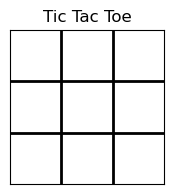

Available positions: [1, 2, 3, 4, 5, 6, 7, 8, 9]


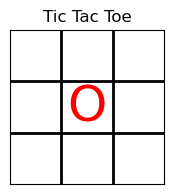

AI chooses position: 1


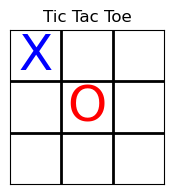

Available positions: [2, 3, 4, 6, 7, 8, 9]


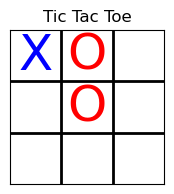

AI chooses position: 8


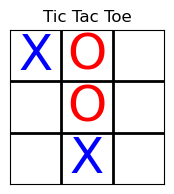

Available positions: [3, 4, 6, 7, 9]


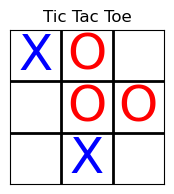

AI chooses position: 4


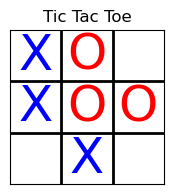

Available positions: [3, 7, 9]


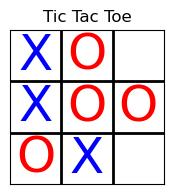

AI chooses position: 3


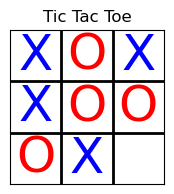

Available positions: [9]


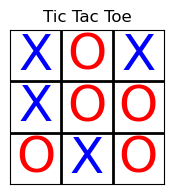

It's a tie!


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def draw_tictactoe_board(board):
    fig, ax = plt.subplots(figsize=(2, 2))

    for x in range(1, 3):
        ax.axvline(x, color="black", linewidth=2)
        ax.axhline(x, color="black", linewidth=2)

    for i in range(3):
        for j in range(3):
            if board[i, j] == 1:
                ax.text(j + 0.5, 2.5 - i, "X", ha="center", va="center", fontsize=36, color="blue")
            elif board[i, j] == -1:
                ax.text(j + 0.5, 2.5 - i, "O", ha="center", va="center", fontsize=36, color="red")

    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    plt.title("Tic Tac Toe")
    plt.show()

def check_winner(board):
    for i in range(3):
        if abs(sum(board[i, :])) == 3 or abs(sum(board[:, i])) == 3:
            return True
    if abs(sum(np.diag(board))) == 3 or abs(sum(np.diag(np.fliplr(board)))) == 3:
        return True
    return False

def get_empty_cells(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

def evaluate(board):
    for i in range(3):
        if sum(board[i, :]) == 3 or sum(board[:, i]) == 3:
            return 10  # AI wins
        if sum(board[i, :]) == -3 or sum(board[:, i]) == -3:
            return -10  # Player wins

    if sum(np.diag(board)) == 3 or sum(np.diag(np.fliplr(board))) == 3:
        return 10
    if sum(np.diag(board)) == -3 or sum(np.diag(np.fliplr(board))) == -3:
        return -10

    return 0  # No winner yet

def minimax(board, depth, is_maximizing, alpha, beta):
    score = evaluate(board)
    
    if score == 10:
        return score - depth  # Prioritize quicker wins
    if score == -10:
        return score + depth  # Prioritize delaying losses
    if not get_empty_cells(board):
        return 0  # Tie

    if is_maximizing:
        best = -float('inf')
        for (i, j) in get_empty_cells(board):
            board[i, j] = 1
            best = max(best, minimax(board, depth + 1, False, alpha, beta))
            board[i, j] = 0
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for (i, j) in get_empty_cells(board):
            board[i, j] = -1
            best = min(best, minimax(board, depth + 1, True, alpha, beta))
            board[i, j] = 0
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best

def best_ai_move(board):
    best_val = -float('inf')
    best_move = None

    for (i, j) in get_empty_cells(board):
        board[i, j] = 1
        move_val = minimax(board, 0, False, -float('inf'), float('inf'))
        board[i, j] = 0

        if move_val > best_val:
            best_val = move_val
            best_move = (i, j)

    return best_move

# Initialize board
board = np.zeros((3, 3), dtype=int)
player_turn = True

while True:
    draw_tictactoe_board(board)

    if player_turn:
        empty_cells = get_empty_cells(board)
        print(f"Available positions: {[(i * 3 + j + 1) for i, j in empty_cells]}")
        move = int(input("Enter your move (1-9): ")) - 1
        row, col = divmod(move, 3)
        if (row, col) in empty_cells:
            board[row, col] = -1  # Player is O (-1)
        else:
            print("Invalid move! Try again.")
            continue
    else:
        row, col = best_ai_move(board)
        print(f"AI chooses position: {row * 3 + col + 1}")
        board[row, col] = 1  # AI is X (1)

    if check_winner(board):
        draw_tictactoe_board(board)
        print("AI wins!" if not player_turn else "Player wins!")
        break

    if len(get_empty_cells(board)) == 0:
        draw_tictactoe_board(board)
        print("It's a tie!")
        break

    player_turn = not player_turn